# Forest Cover Type Prediction

https://www.kaggle.com/c/forest-cover-type-prediction

## Author

* Divya Gorantla
* Ram Iyer
* Tiffany Jaya
* Steve Sanders

## Problem

Predict the forest cover type (the predominant kind of tree cover) from stricly cartographic varaibles (as opposed to remotely sensed data). 

## Data Description

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

```
1 - Spruce/Fir 
2 - Lodgepole Pine 
3 - Ponderosa Pine 
4 - Cottonwood/Willow 
5 - Aspen
6 - Douglas-fir
7 - Krummholz
```

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

```
Data Fields
Elevation - Elevation in meters
Aspect - Aspect in degrees azimuth
Slope - Slope in degrees
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation
```

The wilderness areas are:

```
1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area
```

The soil types are:

```
1 Cathedral family - Rock outcrop complex, extremely stony.
2 Vanet - Ratake families complex, very stony.
3 Haploborolis - Rock outcrop complex, rubbly.
4 Ratake family - Rock outcrop complex, rubbly.
5 Vanet family - Rock outcrop complex complex, rubbly.
6 Vanet - Wetmore families - Rock outcrop complex, stony.
7 Gothic family.
8 Supervisor - Limber families complex.
9 Troutville family, very stony.
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
11 Bullwark - Catamount families - Rock land complex, rubbly.
12 Legault family - Rock land complex, stony.
13 Catamount family - Rock land - Bullwark family complex, rubbly.
14 Pachic Argiborolis - Aquolis complex.
15 unspecified in the USFS Soil and ELU Survey.
16 Cryaquolis - Cryoborolis complex.
17 Gateview family - Cryaquolis complex.
18 Rogert family, very stony.
19 Typic Cryaquolis - Borohemists complex.
20 Typic Cryaquepts - Typic Cryaquolls complex.
21 Typic Cryaquolls - Leighcan family, till substratum complex.
22 Leighcan family, till substratum, extremely bouldery.
23 Leighcan family, till substratum - Typic Cryaquolls complex.
24 Leighcan family, extremely stony.
25 Leighcan family, warm, extremely stony.
26 Granile - Catamount families complex, very stony.
27 Leighcan family, warm - Rock outcrop complex, extremely stony.
28 Leighcan family - Rock outcrop complex, extremely stony.
29 Como - Legault families complex, extremely stony.
30 Como family - Rock land - Legault family complex, extremely stony.
31 Leighcan - Catamount families complex, extremely stony.
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34 Cryorthents - Rock land complex, extremely stony.
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
40 Moran family - Cryorthents - Rock land complex, extremely stony.
```

## Libraries

In [42]:
# output plots within notebook
%matplotlib inline

# install the kaggle library
!pip install kaggle

# install libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# set seed for reproducibility
tf.set_random_seed(6)

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Load Data

In order to use Kaggle API:
1. Login to your Kaggle account
2. Select 'My account'
3. Select 'Create New API Token'
4. Place the token 'kaggle.json' into ~/.kaggle

In [3]:
# download each ZIP file from Kaggle
!kaggle competitions download -c forest-cover-type-prediction -p ./data 

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
TRAIN_FILENAME = 'train.csv'
TEST_FILENAME = 'test.csv'
SAMPLE_SUBMISSION_FILENAME = 'sampleSubmission.csv'
DATAPATH = './data/'

def get_data(filename, unzip=False):
    '''Read CSV file (unzip or not) into a dataframe'''
    if unzip:
        zippath = DATAPATH + filename + '.zip'
        return pd.read_csv(zippath, compression='zip', header=0, sep=',', quotechar='"')
    
    filepath = DATAPATH + filename
    return pd.read_csv(filepath, header=0, sep=',', quotechar='"')
    
train = get_data(TRAIN_FILENAME, unzip=True)
test = get_data(TEST_FILENAME, unzip=True)
sample = get_data(SAMPLE_SUBMISSION_FILENAME, unzip=True)

In [136]:
train_labels = train['Cover_Type']
cover_types = sorted(pd.unique(train['Cover_Type']))
cover_labels = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
wilderness_types = list(range(1,5))
wilderness_labels = ['Rawah', 'Neota', 'Comanche', 'Cache la Poudre']
soil_types = list(range(1,41))
soil_labels = ['Cathedral family', 
               'Vanet', 
               'Haploborolis', 
               'Ratake family',
               'Vanet family',
               'Vanet - Wetmore families',
               'Gothic family',
               'Supervisor',
               'Troutville family',
               'Bullwark - Catamount families',
               'Bullwark - Catamount families',
               'Legault family',
               'Catamount family',
               'Pachic Argiborolis',
               '',
               'Cryaquolis',
               'Gateview family',
               'Rogert family',
               'Typic Cryaquolis',
               'Typic Cryaquepts',
               'Typic Cryaquolls',
               'Leighcan family',
               'Leighcan family',
               'Leighcan family',
               'Leighcan family',
               'Granile',
               'Leighcan family',
               'Leighcan family',
               'Como - Legault families',
               'Como family',
               'Leighcan - Catamount families',
               'Catamount family',
               'Leighcan - Catamount families',
               'Cryorthents',
               'Cryumbrepts',
               'Bross family',
               'Cryumbrepts',
               'Leighcan - Moran families',
               'Moran family - Cryorthents',
               'Moran family - Cryorthents'
              ]
soil_descriptions = ['Rock outcrop complex, extremely stony',
                     'Ratake families complex, very stony',
                     'Rock outcrop complex, rubbly',
                     'Rock outcrop complex, rubbly',
                     'Rock outcrop complex, rubbly',
                     'Rock outcrop complex, stony',
                     '',
                     'Limber families complex',
                     'very stony',
                     'Rock outcrop complex, rubbly',
                     'Rock land complex, rubbly',
                     ' Rock land complex, stony',
                     'Rock land - Bullwark family complex, rubbly',
                     'Aquolis complex',
                     '',
                     'Cryoborolis complex',
                     'Cryaquolis complex',
                     'very stony',
                     'Borohemists complex',
                     'Typic Cryaquolls complex',
                     'Leighcan family, till substratum complex',
                     'till substratum, extremely bouldery',
                     'till substratum, extremely bouldery',
                     'extremely stony',
                     'warm, extremely stony',
                     'Catamount families complex, very stony',
                     'Rock outcrop complex, extremely stony',
                     'Rock outcrop complex, extremely stony',
                     'complex, extremely stony',
                     'Rock land - Legault family complex, extremely stony',
                     'complex, extremely stony',
                     'Rock outcrop - Leighcan family complex, extremely stony',
                     'Rock outcrop complex, extremely stony',
                     'Rock land complex, extremely stony',
                     'Rock outcrop - Cryaquepts complex',
                     'Rock land - Cryumbrepts complex, extremely stony',
                     'Cryumbrepts - Cryorthents complex, extremely stony',
                     'Cryaquolls complex, extremely stony',
                     'Cryorthents - Leighcan family complex, extremely stony',
                     'Cryorthents - Rock land complex, extremely stony'
                    ]

## EDA

In [59]:
print('-' * 80)
print('{:>40}'.format('EDA'))
print('-' * 80)
columns = ['shape', 'types']
rows = ['train', 'test', 'sample']
print(pd.DataFrame({columns[0]: [train.shape, test.shape, sample.shape],
                    columns[1]: [pd.unique(train.dtypes), pd.unique(test.dtypes), pd.unique(sample.dtypes)]},
                   columns=columns,
                   index=rows))
print('-' * 80)
print('{:>50}'.format('Describe Dataset: train'))
print('-' * 80)
print(train.describe())
print('-' * 80)
print(train.columns)


--------------------------------------------------------------------------------
                                     EDA
--------------------------------------------------------------------------------
               shape    types
train    (15120, 56)  [int64]
test    (565892, 55)  [int64]
sample   (565892, 2)  [int64]
--------------------------------------------------------------------------------
                           Describe Dataset: train
--------------------------------------------------------------------------------
                Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.250

### Elevation


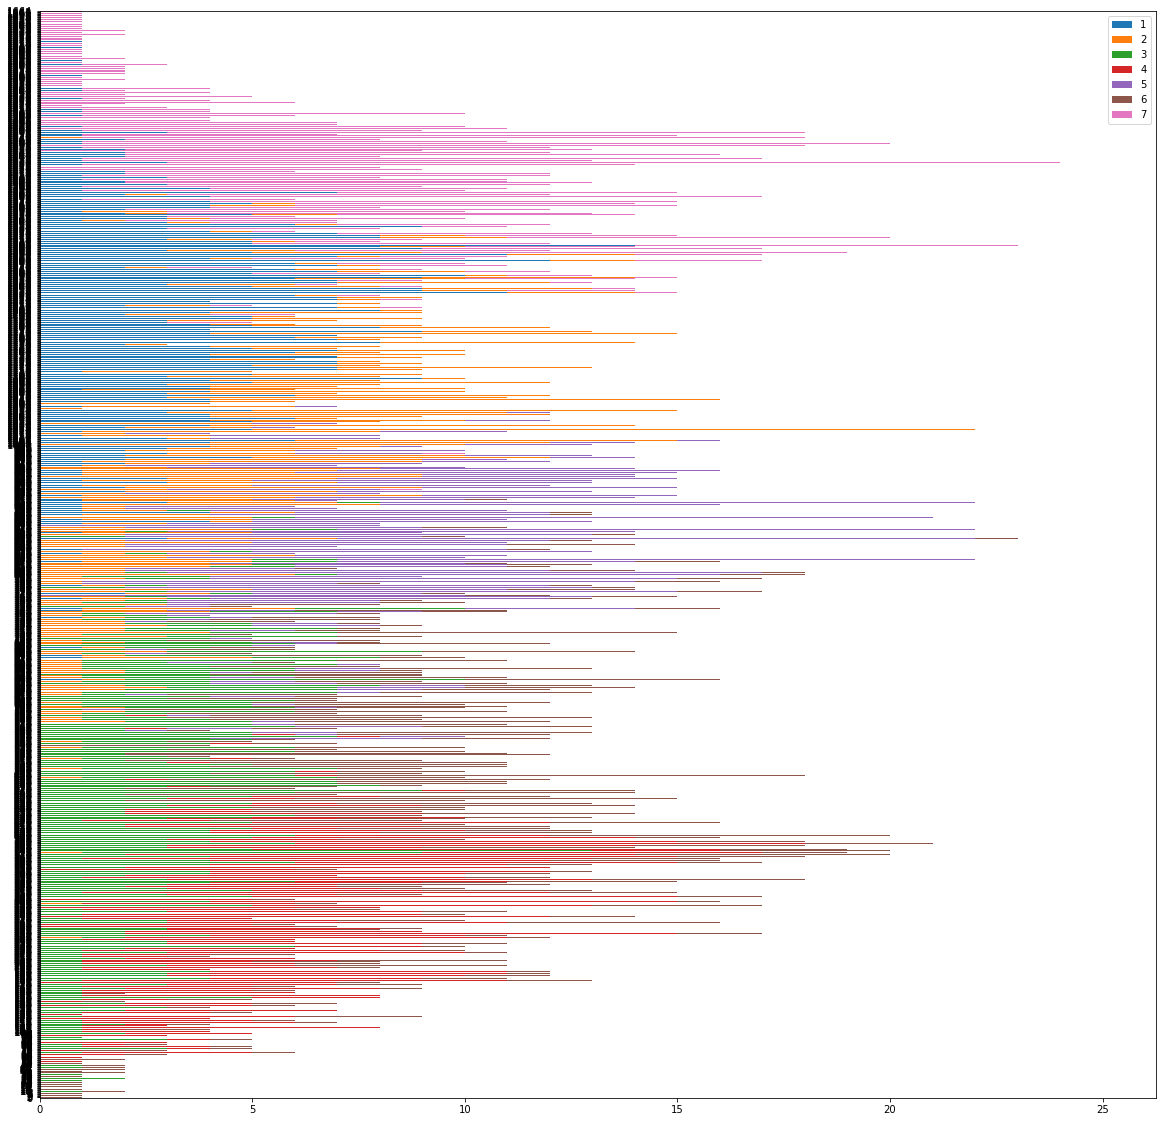

In [24]:
# visualize elevation by cover types
# 1. count the number of cover types per elevation
plt_ct_per_el = pd.DataFrame(pd.crosstab(train['Elevation'], train['Cover_Type']).values.tolist(),
                             columns=sorted(pd.unique(train['Cover_Type'])))
# 2. plot the associating horizontal, stacked graph
plt_ct_per_el.plot.barh(stacked=True, figsize=(20, 20))

From the graph shown above, it appears that the cover types most commonly found at the high altitude is Krummholz followed by the following cover types found in descending order of altitudes: 

```
7 - Krummholz
1 - Spruce/Fir 
2 - Lodgepole Pine
5 - Aspen
3 - Ponderosa Pine 
6 - Douglas-fir
4 - Cottonwood/Willow 
```

The elevation graph is better represented in the histogram below.

Feature Engineering
1.  Elevation - Elevation in meters
2.  Aspect - Aspect in degrees azimuth
3.  Slope - Slope in degrees
4.  Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
5.  Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
6.  Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
7.  Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
8.  Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
9.  Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
10. Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
11. Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
12. Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
13. Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

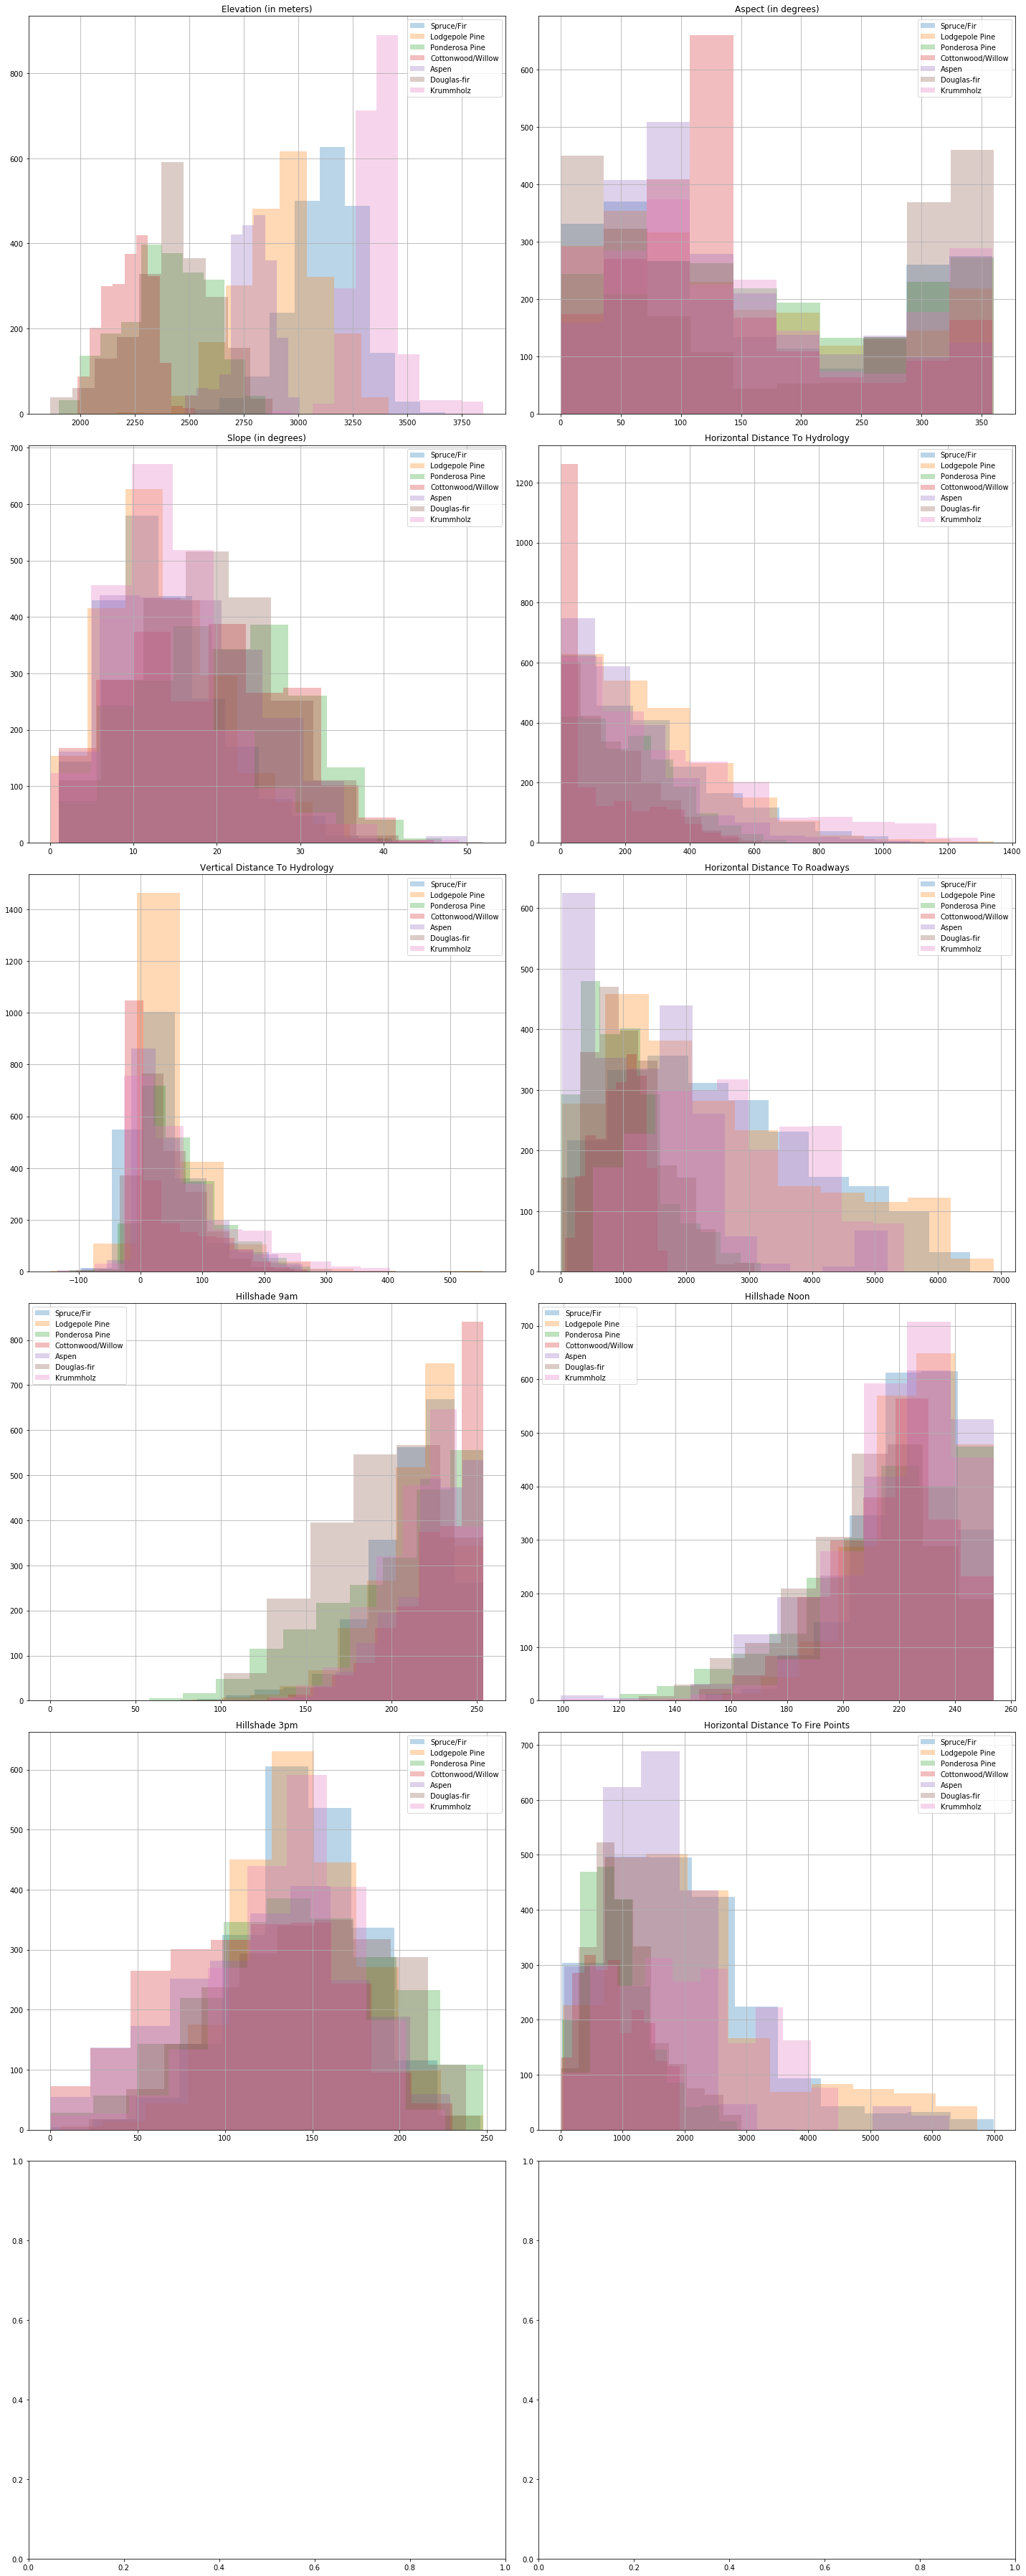

In [53]:
# plot histogram of each column (aka feature)

# 1. plot without overlay
#for column in train.columns[1:11]: 
#    train.groupby('Cover_Type').hist(column=column, alpha=0.3)

# 2. plot with overlay
nrows = 6
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,50))
(ax_elevation, 
 ax_aspect, 
 ax_slope, 
 ax_hd_h20, 
 ax_vd_h20, 
 ax_hd_roadways, 
 ax_hillshade_9am, 
 ax_hillshade_12pm, 
 ax_hillshade_3pm, 
 ax_hd_firepoints, 
 ax_wilderness_area, 
 ax_soil_type )= axes.flatten() 

for label, data in train.groupby('Cover_Type')['Elevation']:
    data.hist(alpha=0.3, ax=ax_elevation)
ax_elevation.set_title('Elevation (in meters)')
ax_elevation.legend(labels=cover_labels)

for label, data in train.groupby('Cover_Type')['Aspect']:
    data.hist(alpha=0.3, ax=ax_aspect)
ax_aspect.set_title('Aspect (in degrees)')
ax_aspect.legend(labels=cover_labels)

for label, data in train.groupby('Cover_Type')['Slope']:
    data.hist(alpha=0.3, ax=ax_slope)
ax_slope.set_title('Slope (in degrees)')
ax_slope.legend(labels=cover_labels)

for label, data in train.groupby('Cover_Type')['Horizontal_Distance_To_Hydrology']:
    data.hist(alpha=0.3, ax=ax_hd_h20)
ax_hd_h20.set_title('Horizontal Distance To Hydrology')
ax_hd_h20.legend(labels=cover_labels)

for label, data in train.groupby('Cover_Type')['Vertical_Distance_To_Hydrology']:
    data.hist(alpha=0.3, ax=ax_vd_h20)
ax_vd_h20.set_title('Vertical Distance To Hydrology')
ax_vd_h20.legend(labels=cover_labels)

for label, data in train.groupby('Cover_Type')['Horizontal_Distance_To_Roadways']:
    data.hist(alpha=0.3, ax=ax_hd_roadways)
ax_hd_roadways.set_title('Horizontal Distance To Roadways')
ax_hd_roadways.legend(labels=cover_labels)

for label, data in train.groupby('Cover_Type')['Hillshade_9am']:
    data.hist(alpha=0.3, ax=ax_hillshade_9am)
ax_hillshade_9am.set_title('Hillshade 9am')
ax_hillshade_9am.legend(labels=cover_labels)

for label, data in train.groupby('Cover_Type')['Hillshade_Noon']:
    data.hist(alpha=0.3, ax=ax_hillshade_12pm)
ax_hillshade_12pm.set_title('Hillshade Noon')
ax_hillshade_12pm.legend(labels=cover_labels)

for label, data in train.groupby('Cover_Type')['Hillshade_3pm']:
    data.hist(alpha=0.3, ax=ax_hillshade_3pm)
ax_hillshade_3pm.set_title('Hillshade 3pm')
ax_hillshade_3pm.legend(labels=cover_labels)

for label, data in train.groupby('Cover_Type')['Horizontal_Distance_To_Fire_Points']:
    data.hist(alpha=0.3, ax=ax_hd_firepoints)
ax_hd_firepoints.set_title('Horizontal Distance To Fire Points')
ax_hd_firepoints.legend(labels=cover_labels)

fig.tight_layout()
plt.show()

From the plot above, "Evaluation" makes a good feature because there is not much overlap between the different tree types. 

### Distance



### Hillshade

Hillshade is measured on a scale from 0 to 255 (dark to bright).

Hillshade at time t varies as a factor of:

$cos(slope)cos(90−Altitude)+sin(slope)sin(90−Altitude)cos(Azimuth−Aspect)$

where Altitude is the angle of the Sun relative to the horizon and Azimuth relates to the direction the Sun is facing: North, South, East, or West. Azimuth of 90 degrees corresponds to East.

In short, the illumination of the patch is related to alitude of the sun, slope of the terrain and the relative direction of the sun and the slope.



### Wilderness Area 

Based on wilderness area, we noted that:

* Spruce/Fir (1) is located in Rawah (1), Neota (2), Comanche (3)
* Lodgepole Pine (2) is located in all wilderness area, with the most notable in Rawah (1) and Comanche (2)
* Ponderosa Pine (3) is located in Comanche (3) and Cache la Poudre(4)
* **Cottonwood/Willow (4) is located only in Cache la Poudre (4)**
* Aspen (5) is located in Rawah (1) and Comanche (3)
* Douglas-fir (6) is located in Comanche (3) and Cache la Poudre (4)
* Krummholz (7) is located in Cover (1), Neota (2), Comanche (3)

For this reason, wilderness area is a substantial feature to use to determine a cover type.

In [126]:
freq_ct_wilderness_1 = pd.crosstab(train['Wilderness_Area1'], train['Cover_Type']).iloc[1].tolist()
freq_ct_wilderness_2 = pd.crosstab(train['Wilderness_Area2'], train['Cover_Type']).iloc[1].tolist()
freq_ct_wilderness_3 = pd.crosstab(train['Wilderness_Area3'], train['Cover_Type']).iloc[1].tolist()
freq_ct_wilderness_4 = pd.crosstab(train['Wilderness_Area4'], train['Cover_Type']).iloc[1].tolist()
freq_ct_wilderness = pd.DataFrame([freq_ct_wilderness_1, freq_ct_wilderness_2, freq_ct_wilderness_3, freq_ct_wilderness_4], 
                                  columns=cover_labels, 
                                  index=wilderness_labels)

In [127]:
freq_ct_wilderness

,Spruce/Fir,Lodgepole Pine,Ponderosa Pine,Cottonwood/Willow,Aspen,Douglas-fir,Krummholz
Rawah,1062,1134,0,0,856,0,545
Neota,181,66,0,0,0,0,252
Comanche,917,940,863,0,1304,962,1363
Cache la Poudre,0,20,1297,2160,0,1198,0


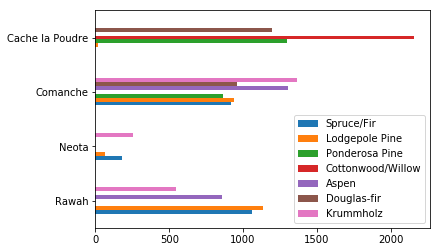

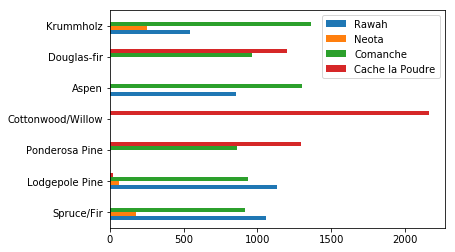

In [128]:
freq_ct_wilderness.plot(kind='barh', stacked=False)
freq_ct_wilderness.T.plot(kind='barh', stacked=False)

### Soil Type

As you can see below, each cover type sits on a broad range of soils. In addition, there seems to be repeated types of soil separated into multiple categories. For this reason, soil is not a good feature to determine cover types.

During our analysis, we ignore soil type 7 and 15 because these soil types are absent in our sample.

In [153]:
print(pd.unique(train['Soil_Type7']))
print(pd.unique(train['Soil_Type15']))

[0]
[0]


In [157]:
list_freq_ct_wilderness = []
for i in soil_types:
    # ignore soil type: 7, 15
    if i not in (7, 15):
        soil_type = 'Soil_Type{}'.format(i)
        pd.crosstab(train[soil_type], train['Cover_Type']).iloc[1].tolist()
        list_freq_ct_wilderness.append(pd.crosstab(train[soil_type], train['Cover_Type']).iloc[1].tolist())

soil_labels_wo_7_15 = [soil_label for ignore_label, soil_label in enumerate(soil_labels) if ignore_label not in [7,15]]
freq_ct_soil = pd.DataFrame(list_freq_ct_wilderness, 
                            columns=cover_labels, 
                            index=soil_labels_wo_7_15)

In [158]:
freq_ct_soil

,Spruce/Fir,Lodgepole Pine,Ponderosa Pine,Cottonwood/Willow,Aspen,Douglas-fir,Krummholz
Cathedral family,0,0,121,139,0,95,0
Vanet,0,3,283,94,61,182,0
Haploborolis,0,12,133,799,0,18,0
Ratake family,5,20,462,133,129,87,7
Vanet family,0,0,55,39,0,71,0
Vanet - Wetmore families,0,7,248,244,0,151,0
Gothic family,0,1,0,0,0,0,0
Troutville family,1,9,0,0,0,0,0
Bullwark - Catamount families,9,81,717,170,64,1101,0
Bullwark - Catamount families,5,67,89,24,154,67,0


## Feature Engineering

```
Elevation - Elevation in meters
Aspect - Aspect in degrees azimuth
Slope - Slope in degrees
Euclidean_Distance_To_Hydrology - Euclidean Dist to nearest surface water features
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
Hillshade_mean (0 to 255 index) - mean of Hillshade index (at 9am, 12pm, 3pm), summer solstice
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
```

## Model 

### Logistic Regression